In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_solos_df = pd.read_csv('train_solos_df.csv', index_col='Unnamed: 0')
train_solos_df.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,0,100.00,0,0,45,0,1,1,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,0,8.54,0,0,48,1000,0,0,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7370
2,b7807186e3f679,0,1,324.20,1,5,5,986,4,1,...,-1,1228.0,0,76.80,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,0,3,254.20,0,12,13,0,2,1,...,1536,2368.0,0,15.29,0,0,1787.00,3,0,0.8213
4,47143f942503e0,0,0,136.90,0,0,37,0,1,1,...,1500,0.0,0,0.00,0,0,270.80,1,0,0.3474


# Data Storytelling

In PlayerUnknown's Battlegrounds (PUBG) there are two well defined styles of play, aggressive and passive. An aggressive play style is when a player seeks out others in an attempt to kill as many people as possible, often going out of their way to find other players. The passive play style has players dropping on to the island, looting buildings, then playing the waiting game, often camping in buildings and waiting for other players to come to them. Both play styles have their merit, but which is the best to get you the win?

First some data needs to be dropped. In this game, there was a rampant cheating problem back in early 2018, using a couple different criteria, these cheaters will be removed from the dataset

In [3]:
train_solos_df[train_solos_df['kills'] >= 50]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
54296,810f2379261545,20,0,6616.0,13,5,1,0,65,7,...,1500,0.0,0,0.0,0,0,1036.00,60,0,1.0
124549,2ade4369bccd12,12,0,5556.0,7,4,1,0,55,6,...,1500,0.0,0,0.0,0,0,85.56,66,0,1.0
128897,7f3edd982813e6,6,0,5410.0,16,14,1,1000,56,5,...,-1,0.0,0,0.0,0,0,287.50,50,1500,1.0
202420,80ac0bbf58bfaf,5,0,6376.0,21,4,1,0,66,8,...,1500,0.0,0,0.0,0,0,1740.00,23,0,1.0
236013,c47bd86daa3de6,2,2,4496.0,42,2,1,1000,50,7,...,-1,0.0,0,0.0,0,0,1021.00,15,1500,1.0
237412,be4ff9afaa5bb1,22,0,5376.0,8,4,3,0,53,3,...,1500,954.5,0,0.0,0,0,1128.00,83,0,0.8
242116,1f6ceaa5140fb6,15,0,5468.0,13,5,2,0,56,4,...,1500,3492.0,0,0.0,0,0,1059.00,60,0,0.9
421731,436d1530e9eb00,5,0,4348.0,31,0,1,0,53,8,...,1500,0.0,0,0.0,0,0,134.20,36,0,1.0
474905,97047ef60af1e7,11,0,5520.0,8,4,1,0,53,3,...,1500,1645.0,0,0.0,0,0,1045.00,57,0,1.0


Having played the game, I'm fairly certain these are cheaters that used hacking techniques to have instant kills across the map. Especially #236013, I don't like that 84% of his kills were headshot kills, and his longest kill was over 300 meters. That screams cheating.

In [4]:
train_solos_df = train_solos_df.drop(train_solos_df[train_solos_df['kills'] >= 50].index)
train_solos_df.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,...,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720378.000000,720377.000000
mean,0.061339,1.059984,118.790504,0.248307,1.013444,47.474683,447.324319,0.933192,0.474580,21.537013,...,966.798971,463.293209,0.005115,5.088822,0.011459,0.004512,955.358638,3.586761,557.246283,0.487424
std,0.287729,1.799537,165.966026,0.653610,2.405164,27.723178,595.021659,1.577191,0.563333,46.535558,...,744.267990,1373.931873,0.087981,34.202911,0.106459,0.069617,1069.843998,2.588692,728.786899,0.298456
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.250000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.840000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,39.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,2.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


Continuing the search for cheaters, anyone with more than an 80% headshot kill to kill ratio and more than 20 kills could be classified as a cheater and should not be considered within the dataset.

In [5]:
train_solos_df[((train_solos_df['headshotKills'] / train_solos_df['kills']) >= 0.8) & (train_solos_df['kills'] >= 20)]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
158594,8e9eb1ce0e0135,0,7,2068.0,19,2,1,0,21,2,...,1507,808.0,0,0.0,0,0,3508.0,4,0,1.0
330512,3e28994fb2950b,1,0,3696.0,39,2,1,0,41,8,...,1500,0.0,0,0.0,0,0,973.0,21,0,1.0
544484,a7ad68271a7137,5,0,2560.0,23,0,3,1000,25,9,...,-1,3540.0,0,0.0,0,0,1046.0,14,1500,0.9


In [6]:
train_solos_df = train_solos_df.drop(train_solos_df[((train_solos_df['headshotKills'] / train_solos_df['kills']) >= 0.8) & (train_solos_df['kills'] >= 20)].index)

Next we take a look at match duration. Looking for matches that lasted shorter than about 15 minutes could mean that the game started with a well below average number of people.

In [7]:
three_down = np.mean(train_solos_df['matchDuration']) - 3 * np.std(train_solos_df['matchDuration'])
print(three_down)

830.3710893862144


three_down will look for matches in this database that lasted less than 830 seconds, which is about 14 minutes. Games in PUBG typically last around 1600 seconds or around 26 minutes. These are games that could have started with a small amount of people. Only 30 or so people, so getting rid of these will drop all of those games that started with a well below average number of people.

In [8]:
train_solos_df[(train_solos_df['matchDuration'] <= three_down)]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
211,32220283493bc2,2,0,655.00,2,0,11,1000,6,3,...,-1,0.00,0,0.00,0,0,29.560,9,1500,0.4736
1055,6ab29688a68902,0,2,85.70,0,7,3,0,1,1,...,1500,0.00,0,0.00,0,0,187.100,1,0,0.7780
6004,8358fd4679e2db,4,0,339.00,1,0,13,1000,3,1,...,-1,1607.00,0,0.00,0,0,1282.000,9,1500,0.3684
8206,26809358eab674,1,0,352.20,0,2,6,0,2,1,...,1500,0.00,0,0.00,0,0,502.500,25,0,0.0000
8415,a16a20a3305521,0,1,522.00,1,5,6,0,2,1,...,1500,2388.00,0,0.00,0,0,1472.000,18,0,0.1667
10647,822d53b0965228,4,0,1009.00,1,0,7,1000,12,3,...,-1,0.00,0,0.00,0,0,339.200,20,1500,0.7500
16032,a2b88f886138cf,0,0,200.00,1,1,16,1000,2,2,...,-1,0.00,0,0.00,0,0,1686.000,7,1500,0.9443
16068,1ac82deebad3df,0,0,0.00,0,0,13,1000,0,0,...,-1,0.00,0,0.00,0,0,163.600,1,1500,0.1333
16653,d897450a550371,1,1,689.00,7,3,16,1000,7,2,...,-1,1657.00,0,0.00,0,0,2420.000,12,1500,0.5806
20197,ef3c16baa36e0f,0,0,29.40,0,0,6,0,0,0,...,1500,0.00,0,0.00,0,0,17.160,1,0,0.5000


In [9]:
train_solos_df = train_solos_df.drop(train_solos_df[(train_solos_df['matchDuration'] <= three_down)].index)
train_solos_df.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,...,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000,719937.000000
mean,0.060916,1.060325,118.635291,0.247738,1.013297,47.496199,447.310804,0.931598,0.474196,21.526882,...,966.903819,463.386043,0.005117,5.090250,0.011455,0.004514,955.432632,3.583739,557.156339,0.487390
std,0.285408,1.799856,165.472305,0.648956,2.405124,27.716388,595.075446,1.571368,0.562466,46.527215,...,744.252849,1374.159373,0.088000,34.209228,0.106440,0.069638,1069.791491,2.580297,728.765535,0.298442
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.200000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.810000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,26.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,2.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


In the teamKills column, there is a max of 2. Someone can't kill themselves twice in a solos game. Let's see that data point


In [10]:
train_solos_df[train_solos_df['teamKills'] == max(train_solos_df['teamKills'])]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
58140,6e34b7909e4691,1,2,881.0,6,17,6,0,12,2,...,1500,0.0,0,0.0,2,0,133.0,38,0,0.4
446343,0c575f045d2fb1,3,0,566.0,1,2,23,0,2,1,...,1500,0.0,0,0.0,2,0,1810.0,26,0,0.0


Two of them. These data points have clearly bad data in them, so they must be removed from the data set

In [11]:
train_solos_df = train_solos_df.drop(train_solos_df[train_solos_df['teamKills'] == 2].index)
train_solos_df.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,...,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000
mean,0.060911,1.060325,118.633610,0.247729,1.013273,47.496291,447.312046,0.931581,0.474193,21.526636,...,966.902338,463.387331,0.005117,5.090264,0.011450,0.004514,955.432587,3.583660,557.157886,0.487390
std,0.285385,1.799858,165.469255,0.648921,2.405053,27.716368,595.075806,1.571316,0.562464,46.526939,...,744.253353,1374.161065,0.088000,34.209275,0.106389,0.069638,1069.792064,2.579846,728.765955,0.298442
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.200000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.810000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,26.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


In [12]:
train_solos_df = train_solos_df.reset_index().drop('index', axis=1)

In [13]:
train_solos_df.to_csv('wrangled_train_solos_df.csv')

In [14]:
test_solos_df = pd.read_csv('test_solos_df.csv', index_col='Unnamed: 0')
test_solos_df = test_solos_df.drop(test_solos_df[test_solos_df['kills'] >= 50].index)
test_solos_df = test_solos_df.drop(test_solos_df[((test_solos_df['headshotKills'] / test_solos_df['kills']) >= 0.8) & (test_solos_df['kills'] >= 20)].index)
test_solos_df = test_solos_df.drop(test_solos_df[(test_solos_df['matchDuration'] <= np.mean(test_solos_df['matchDuration']) - 3 * np.std(test_solos_df['matchDuration']))].index)
test_solos_df = test_solos_df.drop(test_solos_df[test_solos_df['teamKills'] == 2].index)
test_solos_df = test_solos_df.reset_index().drop('index', axis=1)
test_solos_df.to_csv('wrangled_test_solos_df.csv')

Moving on to data analysis. Our target variable when we eventually take machine learning algorithms to this dataset is the winPlacePerc column. There are a number of different factors that go into each game, and we'll take some time to examine how different variables like kills, damage dealt, kill place etc. factor into a winning game.

First let's see how kills stack up with win place percentage

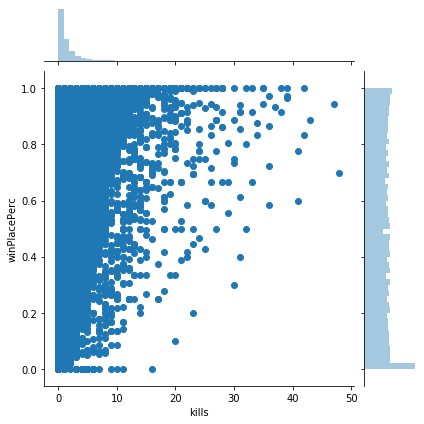

In [15]:
sns.jointplot(x='kills', y='winPlacePerc', data=train_solos_df)

Seems like a clear upward trend that the more kills you have, the more likely you are to win. However, there are a lot of low kill games, so how many people had a low kill game and won compared to more kills?

In [16]:
train_solos_df[(train_solos_df['kills'] <= 5) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

4566

In [17]:
train_solos_df[(train_solos_df['kills'] > 5) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

3987

About equal, what about damage dealt?

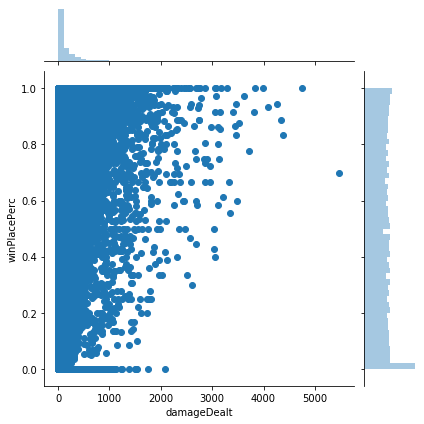

In [18]:
sns.jointplot(x='damageDealt', y='winPlacePerc', data=train_solos_df)

Here we see a less defined upward trend, and an outlier seems to have appeared.

In [19]:
train_solos_df[train_solos_df['damageDealt'] > 5000]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
25424,746aa7eabf7c86,21,0,5480.0,12,7,4,0,48,6,...,1500,0.0,0,0.0,0,0,23.7,61,0,0.7


Here's that data point by itself on the right. I'm hesitent to call this one a cheater, as the headshot kills is only a quarter of this person's total kill count. This person could have dropped onto the map where there was a lot of other people and successfully fought his way out, then kept running into others. Also he didn't finish anywhere near 1st place, seemingly finishing in the high 20's

How about killPlace? If you're the top shot in your game, will you generally do better?

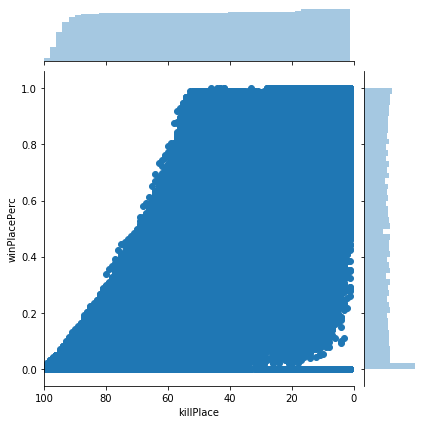

In [20]:
sns.jointplot(x='killPlace', y='winPlacePerc', data=train_solos_df, xlim=(100,0))

Definitely seems like the higher your kill place the more likely you are to win. Lends some credence to the theory that playing more aggressively and getting kills is the best way to win in PUBG. 

Going along with aggressive playstyle, if someone is aggressive, that means they should take damage a lot too, but generally win their gunfights. In PUBG if you take damage, you can heal yourself, so how does the number of heals you use compare to your chances of winning?

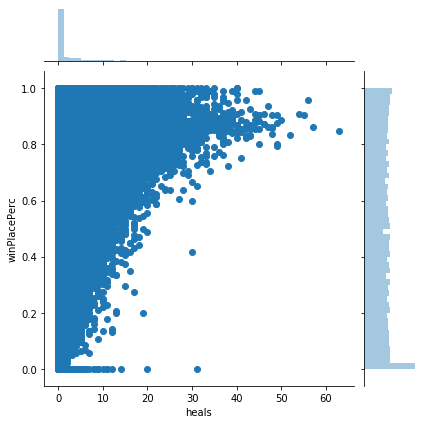

In [21]:
sns.jointplot(x='heals', y='winPlacePerc', data=train_solos_df)

It definitely seems like the more heals someone uses, the more likely they are to win. That goes hand in hand with that aggressive playstyle, as the more people someone finds, the more likely they are to get shot and need to heal back up. However, there are quite a few games where people used only a few heals, so let's look in the dataframe for people using 5 or less heals and winning and count how many there are.

In [22]:
train_solos_df[(train_solos_df['heals'] <= 5) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

7209

7209 people used 5 or less heals and won the game. Using this few healing items could suggest a camping style of play where they sit in one place and let people come to them. What about people who used more than 5 heals and won?

In [23]:
train_solos_df[(train_solos_df['heals'] > 5) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

1344

Quite a bit less, only 1344. Though this could just be that very few people have such good games and are generally better at hitting their targets than their opponents.

Match duration could be the next best logical step when determining how likely someone is to win. If a player is in a game longer, it means they're not dying and surviving their way up the leader boards.

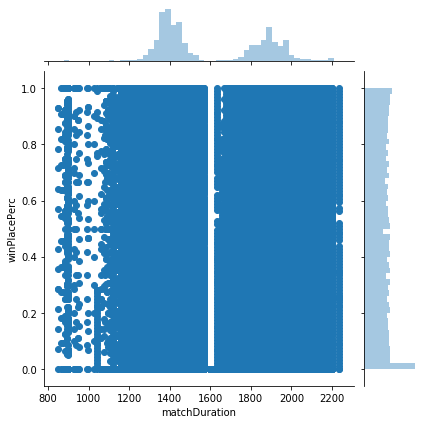

In [24]:
sns.jointplot(x='matchDuration', y='winPlacePerc', data=train_solos_df)

Quite the bimodal distribution. It doesn't matter how long a game goes on and if that decides a winner. There is a split at around 1600 seconds, who won more on either side of that line?

In [25]:
train_solos_df[(train_solos_df['matchDuration'] < 1600) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

4550

In [26]:
train_solos_df[(train_solos_df['matchDuration'] >= 1600) & (train_solos_df['winPlacePerc'] == 1)]['Id'].count()

4003

4550 wins for matches lasting less than 1600 seconds compared to 4003 wins for matches lasting more than 1600 seconds. So match duration has no effect on the outcome of a game of PUBG.

What about the number of weapons acquired? In PUBG you can only carry 3 weapons, two primary weapons (that can be any weapon variety that isn't a sidearm, AR/DMR/Sniper/Shotgun) and one sidearm. It's possible that as people pick up more weapons just by switching out weapons found at the beginning of the game, right when they drop onto the island, for weapons players find later in the game. Maybe players didn't find their preferred loadout right at the start of the game, but as the game progressed was able to switch to it.

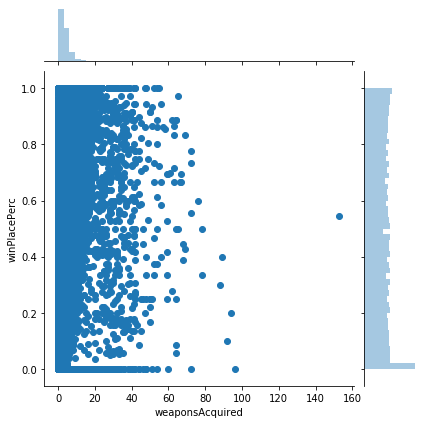

In [27]:
sns.jointplot(x='weaponsAcquired', y='winPlacePerc', data=train_solos_df)

Found an outlier, let's see that data point

In [28]:
train_solos_df[train_solos_df['weaponsAcquired'] == max(train_solos_df['weaponsAcquired'])]

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
453113,da68d2812229a8,0,0,0.0,0,0,58,0,0,0,...,1527,0.0,0,0.0,0,0,1235.0,153,0,0.5464


153 weapons acquired and 0 kills. Ouch. Let's look at the same graph but without that outlier removed.

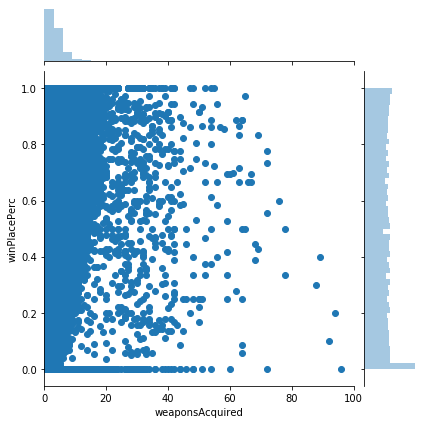

In [29]:
sns.jointplot(x='weaponsAcquired', y='winPlacePerc', data=train_solos_df, xlim=(0, 100))

Judging by the far right data points, the maxes seemed to get lower as win place percentage got higher. This graph makes it seem like the less weapons a person picks up, the better they will do. However, those are just a few data points out of the 700,000 in this dataset. Judging by the more clumped up data points on the left, it seems there's a clear rise in weapons acquired as the win place percentage increases. Perhaps people found their preferred loadout as the game went on and were more comfortable with the guns in their hands, thus doing better and able to win more games.